# Índice

- [Introducción](#Introducción)
    - [Objetivos del cuaderno](#Objetivos-del-cuaderno)
    - [Motivación y contexto](#Motivación)
    - [Rol del algoritmo en la computación cuántica](#Rol-del-algoritmo)
- [Especificación formal del problema](#Especificación-formal)
  - [Precondiciones](#Precondiciones)
  - [Poscondiciones](#Poscondiciones)
- [Algoritmo cuántico paso a paso](#Algoritmo)
- [Implementación práctica](#Implementación)


# Introducción

## Objetivos del cuaderno
 - Motivar el desarrollo de la implementación del algoritmo para la solución del problema de búsqueda de período.
 - Entender el problema que resuelve el algoritmo de búsqueda de período cuántico. Cuáles son sus componentes y sus fundamentos teóricos (especificación del problema). 
 - Presentar el algoritmo a implementar y defender su correctitud (del libro Nielsen & Chuang).
 - Preparar la entrada del algoritmo a usar en la implementación: garantizar la precondición del problema.
 - Implementar el algoritmo propuesto y defender por qué lo representa adecuadamente: descripción de los circuitos y las decisiones tomadas. 
 - Evaluar que la salida de la implementación cumpla la poscondición del problema.  

## Motivación

**La búsqueda de período consiste en encontrar el período $r$ de una función periódica $f(x)$, donde $f(x)=f(x+r)$ para todos los valores de $x$.** 

### ¿Por qué la búsqueda de período es difícil clásicamente?

Supongamos que  la función $f(x) = f(x + r)$ para algún $r$ desconocido y $x$ en un dominio muy grande. Clásicamente, tendrías que evaluar $f$ muchas veces para encontrar $r$. Cuánticamente, podemos explotar la superposición y la interferencia para encontrar $r$ en tiempo polinomial.



## Rol del algoritmo en la computación cuántica (Shor, Fourier, Period Finding)

**Factorización de enteros**

Nielsen y Chuang presentan la factorización como la aplicación más importante del algoritmo de búsqueda de período. Para factorizar un entero compuesto $N$, el algoritmo de Shor reduce el problema a encontrar el orden de un elemento en el grupo multiplicativo $\mathbb{Z}_N^*$ (conjunto de todos los enteros positivos menores que $N$ que son coprimos con $N$, junto con la operación de multiplicación módulo $N$). El orden de un elemento $a$ es el menor entero positivo $r$ tal que $a^r$ es congruente con $1$ módulo $N$ ($a^r \equiv 1 (mod N)$).

Dado un entero $a$ coprimo con $N$, se define la función $f(x)=a^x \mod N$. Esta función es periódica con período igual al orden de $a$ módulo $N$. El algoritmo de búsqueda de período puede encontrar este orden eficientemente, y con probabilidad constante, el orden conduce a una factorización no trivial de $N$.

La implementación de la exponenciación modular $a^x \mod N$ requiere circuitos cuánticos para aritmética modular. Nielsen y Chuang describen cómo implementar estas operaciones usando $O((log⁡(N))^2)$ puertas elementales, manteniendo la eficiencia polinomial del algoritmo completo.

**Logaritmos Discretos**

El algoritmo de búsqueda de período también resuelve el problema del logaritmo discreto en grupos finitos. Dado un grupo cíclico $G$ de orden $r$, un generador $g$, y un elemento $h\in G$, el objetivo es encontrar $x$ tal que $g^x=h$

Nielsen y Chuang construyen una función periódica bidimensional $f(x_1,x_2)=g^{x_1}h^{−x_2}$ y aplican una versión generalizada del algoritmo de búsqueda de período. La función es constante (igual a la identidad del grupo) cuando $g^{x_1}=h^{x_2}$, lo que ocurre cuando $x_1−ax_2 \equiv 0(\mod r)$, donde $a$ es el logaritmo discreto buscado.

**El Problema del Subgrupo Oculto**

Nielsen y Chuang contextualizan el algoritmo de búsqueda de período dentro del marco más general del problema del subgrupo oculto. Dado un grupo $G$, un subgrupo $H\leq G$, y una función $f:G\rightarrow S$ que es constante en las clases laterales de $H$ y diferente entre clases laterales distintas, el objetivo es determinar $H$.

El algoritmo de búsqueda de período resuelve el problema del subgrupo oculto para grupos abelianos finitos. Para el grupo cíclico $\mathbb{Z}_N$, los subgrupos son de la forma $r\mathbb{Z}_N$ para divisores $r$ de $N$, y el algoritmo de búsqueda de período encuentra eficientemente el generador $r$ del subgrupo oculto.

# Especificación Formal del Problema de Búsqueda de Período

## Precondiciones

**1. Dominio de la función:**

Sea $f: \mathbb{Z}_N \rightarrow S$ una función computable, donde $N=2^t$ (para $t$ qubits) y $S$ es un conjunto finito. 

**2. Periodicidad estricta:**

Existe un entero $r$ (período mínimo) tal que: 
$$f(x)= f(y) \iff x \equiv y \ \ (\mod r), \ \ \forall x, y \in \mathbb{Z}_N $$

*Esto implica que $f$ es constante en clases de equivalencia módulo $r$ y distinta entre clases distintas.* 

**3. Tamaño del registro**

El registro de entrada debe tener $t$ qubits con $N=2^t \geq r^2$. Esto garantiza que la Transformada Cuántica de Fourier (QFT) pueda resolver $r$ con probabilidad $\geq 1/2$ (teorema 5.1, Nielsen & Chuang).

## Poscondiciones

Un algoritmo resuelve este problema si produce un entero $r'$ que satisface:

**1. Validez del período**

$$f(x)=f(x+r') \ \ \forall x \in \mathbb{Z}_N$$

**2. Minimalidad**

$r'$ es el menor entero positivo que cumple la condición anterior. 

**3. Probabilidad de éxito**
$$\mathbb{P}(r'=r)\geq \frac{1}{2} \ \ \text{si } N \geq r^2$$

*La probabilidad se amplifica a $1-\delta$ repitiendo el algoritmo $\mathcal{O} (log(1/\delta)) $*

# Algoritmo (Nielsen & Chuang)

El espacio de trabajo consta de dos registros cuánticos:

- Registro de entrada: $t$ qubits, estados $\ket{x}$ con $x \in \{ 0, \dots, N-1\}$.
- Registro de salida: Suficiente para almacenar la función periódica $f(x)$, estados $\ket{f(x)}$.

## 1. Preparación del estado inicial:

Inicializar dos registros cuánticos:
$$\ket{0}^{\otimes t}\ket{0}$$

## 2. Superposición uniforme:

Aplicar puertas Hadamard al primer registro para crear la superposición:

$$\frac{1}{\sqrt{N}} \sum_{x=0}^{N-1} \ket{x}\ket{0}$$

*Esta superposición permite evaluar la función $f$ simultáneamente para todos los valores $x$, explotando la propiedad de paralelismo cuántico.*

## 3. Evaluación cuántica de la función $f$:

Aplicar el oráculo $U_f: \ket{x}\ket{y} \rightarrow \ket{x}\ket{y \oplus f(x)}$, donde $\oplus$ es la suma bit a bit (XOR), que realiza: 

$$\ket{x} \ket{0} \rightarrow \ket{x}\ket{f(x)}$$

El estado pasa a:
$$\frac{1}{\sqrt{N}}\sum_{x=0}^{N-1}\ket{x}\ket{f(x)}$$

*El oráculo codifica la función $f$ en el segundo registro sin colapsar la superposición del primer registro, manteniendo la coherencia cuántica.*

## 4. Medir el segundo registro:

Al medir el segundo registro se obtiene un valor concreto $\ket{f(x_0)}$ para algún $x_0$.

Debido a que $f$ es periódica con período $r$, todos los $x$ tales que $f(x)=f(x_0)$ difieren en múltiplos de r. Por lo tanto el primer registro queda en la superposición:

$$\ket{f(x_0)} \otimes \frac{1}{\sqrt{M}} \sum_{x: f(x)=f(x_0)}\ket{x}$$ donde $M$ es el número de $x$ que satisfacen $f(x)=f(x_0)$.

Esta medición "filtra" la superposición inicial y proyecta el primer registro en un subespacio que refleja la periodicidad de $f$: $\{x_0, x_0+r, x_0+2r, \dots \}$. Por eso el primer registro queda en la superposición periódica: $$\frac{1}{\sqrt{N/r}}\sum_{k=0}^{N/r-1} \ket{x_0+kr}$$

Es decir, la medición del segundo registro es una medición parcial que colapsa ese registro y condiciona el estado del primer registro a una superposición periódica, sin medir ni colapsar directamente el primer registro. Esto es crucial para que el algoritmo pueda luego aplicar la Transformada Cuántica de Fourier al primer registro y extraer el período.

## 5. Aplicación de la Transformada Cuántica de Fourier inversa (QFT$^\dagger$):

La Transformada Cuántica de Fourier inversa (QFT$^\dagger$) es la transformación unitaria definida sobre el espacio de $N$ estados:

$$QFT_N^\dagger \ket{x} = \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} e^{-2\pi i xy/N}\ket{y}$$

Aplicar QFT$^\dagger$ al sistema: 
$$QFT_N^\dagger(\frac{1}{\sqrt{N/r}}\sum_{k=0}^{N/r-1} \ket{x_0+kr})=\frac{1}{\sqrt{N/r}}\sum_{k=0}^{N/r-1} QFT_N(\ket{x_0+kr}) = \frac{1}{\sqrt{N/r}}\sum_{k=0}^{N/r-1} \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} e^{-2\pi i (x_0+kr)y/N}\ket{y}$$

Intercambiando sumas:
$$= \frac{1}{\sqrt{N/r}}\frac{1}{\sqrt{N}}\sum_{y=0}^{N-1} \sum_{k=0}^{N/r-1}   e^{(-2\pi i x_0y/N) + (-2\pi i kry/N)}\ket{y}=\frac{\sqrt{r}}{N}\sum_{y=0}^{N-1} e^{(-2\pi i x_0y/N)} \left( \sum_{k=0}^{N/r-1}   e^{(-2\pi i kry/N)}\right) \ket{y}$$

La suma interior es geométrica: 

$M:= \frac{N}{r}$

$$\sum_{k=0}^{N/r-1}   e^{-2\pi i kry/N} = \sum_{k=0}^{M-1}   (e^{-2\pi i/M})^k= \frac{1-e^{-2\pi iM/M}}{1-e^{-2\pi i/M}}= \frac{1-1}{1-e^{-2\pi i/M}}= 0 \text{ si } e^{-2\pi i/M}\neq 1 $$

Si $e^{-2\pi i/M}= e^{-2\pi i r/N}= 1 \implies \frac{ry}{N} \in \mathbb{Z} \implies \sum_{k=0}^{N/r-1}   e^{-2\pi i kry/N} = \sum_{k=0}^{N/r-1}  1 = \frac{N}{r}$.

Luego, la amplitud del estado $\ket{y}$ es: $$ \alpha_y= \begin{cases} \frac{1}{\sqrt{r}}e^{(-2\pi i x_0y/N)} && \text{ si } \frac{ry}{N} \in \mathbb{Z} \\ 0 && \text{ en otro caso } \end{cases}$$

Es decir la amplitud es no nula solo para valores de $y$ que son múltiplos enteros de $\frac{N}{r}$: $$y=j\frac{N}{r}, \ \ j=0, 1, \dots, r-1 $$
*La QFT transforma la periodicidad en el dominio de la amplitud en picos localizados en múltiplos de $N/r$, lo que permite extraer información sobre $r$ mediante medición.*

## 6. Medición del primer registro:

Al medir, obtenemos un valor $y$ cercano a un múltiplo entero de $N/r$, es decir:

$$y\approx \frac{jN}{r}, \ \ j=0,1, \dots, r-1$$

## 7. Post-procesamiento clásico (fracciones continuas)

Se utiliza el algoritmo de fracciones continuas para aproximar $y/N$ y extraer $r$ con alta probabilidad:

Una fracción continua de un número real $r$ se representa como: $$r=a_0+ \frac{1}{a_1+\frac{1}{a_2+\frac{1}{a_3+\dots}}}$$ donde $a_0$ es un número entero y los demás $a_i$ son enteros positivos.

**Procedimiento**

Tras medir el primer registro después de la QFT, obtenemos un entero $y$ entre $0$ y $N−1$.

El valor $\frac{y}{N}$ es una aproximación cercana a $\frac{j}{r}$ para algún entero $j$.

El objetivo es encontrar la fracción $\frac{s}{r}$ (en forma reducida) que aproxima $\frac{y}{N}$ con un error depreciable. 

Para ello se calcula la expansión en fracción continua de $\frac{y}{N}$.

Los *convergentes* (fracciones parciales obtenidas truncando la fracción continua) son las mejores aproximaciones racionales a $\frac{y}{N}$.

Se prueban los convergentes para encontrar el denominador $r'$ que cumple:

$$|\frac{y}{N}-\frac{s}{r'}|<\frac{1}{2N}$$

y que además verifica que $f(x)=f(x+r')$ para varios $x$.

El denominador $r'$ que cumple estas condiciones es con alta probabilidad el período $r$ buscado.

## Defensa de la correctitud

**¿Por qué funciona?**

La medición del segundo registro colapsa la superposición a los estados que difieren en múltiplos de $r$, reflejando la periodicidad de $f$. La QFT transforma esta periodicidad en picos de amplitud en múltiplos de $N/r$, haciendo posible extraer $r$ mediante medición.

**Probabilidad de éxito**

Nielsen & Chuang demuestran que si $N\geq r^2$, la probabilidad de obtener un $y$ que permita recuperar $r$ con fracciones continuas es al menos $\frac{4}{\pi ^2} \approx 0.4$. Repeticiones aumentan la probabilidad arbitrariamente.

**Complejidad**



# Implementación

In [32]:
# ==============================================
# 1. Importaciones y configuraciones iniciales
# ==============================================
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
import numpy as np
from fractions import Fraction
import matplotlib.pyplot as plt

print("Bibliotecas importadas correctamente")

Bibliotecas importadas correctamente


- Qiskit: Framework estándar para computación cuántica en Python
- AerSimulator: Simulador de alto rendimiento para ejecutar circuitos.
- Fraction: Para implementar fracciones continuas en el post-procesamiento.
- Matplotlib: Visualización de resultados
- Numpy: Para operaciones matemáticas y uso de $\pi$.

In [34]:
# ==============================================
# 2. Definición de la función periódica (Precondiciones)
# ==============================================
def f(x, r):
    """Función periódica f(x) = x mod r"""
    return x % r

# Parámetros del problema
r = 4  # Período que queremos encontrar
t = 4  # Número de qubits (N=16 >= r²=16)
N = 2**t
m = 2  # Bits necesarios para representar f(x) (0-3)

print(f"Configuración: r={r}, t={t} qubits, N={N}, m={m} bits")

Configuración: r=4, t=4 qubits, N=16, m=2 bits


Elegimos $f(x)= x \mod r$, de este modo garantizamos que sea computable, periódica con período $r$ y de codominio finito a través de las propiedades de la operación módulo. 

Para los parámetros:
- Tomamos r potencia de 2 con el fin de simplificar la implementación del oráculo ya que de esta manera podemos utilizar solo los bits menos significativos para hacer la operación.
- Tomamos t suficientemente grande, tal que $N \geq r^2$, para asegurar una probabilidad alta de hallar $r$.
- Tomamos m suficiente para almacenar los valores que toma $f(x)$: 0, 1, 2 y 3. 


In [36]:
# ==============================================
# 3. Creación del circuito cuántico
# ==============================================

# Registros cuánticos
input_reg = QuantumRegister(t, 'x')     # Registro para superposición de x
output_reg = QuantumRegister(m, 'f(x)') # Registro para f(x)
c_input = ClassicalRegister(t, 'c_x')   # Registro clásico para medir x

# Circuito principal
qc = QuantumCircuit(input_reg, output_reg, c_input)
print("Circuitos y registros creados")

Circuitos y registros creados


Creamos dos registros cuánticos: el de entrada $\ket{x}$ que ocupa t qubits, y el salida para almacenar $\ket{f(x)}$. Además, creamos un registro auxiliar para almacenar los resultados de medición.


In [38]:
# ==============================================
# 4. Superposición uniforme (Paso 2 del algoritmo)
# ==============================================
qc.h(input_reg)  # Aplicar Hadamard a todos los qubits de entrada
qc.barrier(label='Superposición')  # Barrera visual

print("Superposición aplicada")

Superposición aplicada


In [39]:
# ==============================================
# 5. Implementación del oráculo U_f (Paso 3)
# ==============================================
# Para f(x) = x mod 4 (implementación simplificada)

# Conexión directa de los bits menos significativos
qc.cx(input_reg[0], output_reg[0])
qc.cx(input_reg[1], output_reg[1])

qc.barrier(label='Oráculo')  # Barrera visual
print("Oráculo U_f implementado")

Oráculo U_f implementado


- Implementación simplificada: Para r=4 (potencia de 2), x mod 4 corresponde exactamente a los dos bits menos significativos de x. Esto permite una implementación eficiente con solo dos compuertas CNOT. Para períodos arbitrarios se necesitaría aritmética modular cuántica completa.
- Operaciones CNOT: Copian los bits relevantes al registro de salida.

In [41]:
# ==============================================
# 6. QFT inversa (Paso 5) - Implementación manual
# ==============================================
def inverse_qft(qc, qubits):
    """Implementación manual de la QFT inversa"""
    n = len(qubits)
    
    # Fase 1: Swaps para corregir el orden
    for i in range(n//2):
        qc.swap(qubits[i], qubits[n-1-i])
    
    # Fase 2: Rotaciones controladas inversas
    for j in range(n):
        qc.h(qubits[j])
        for k in range(j+1, n):
            angle = -np.pi / (2 ** (k - j))
            qc.cp(angle, qubits[k], qubits[j])
    
    # Nota: En Qiskit podríamos usar QFT(inverse=True)
    # pero implementamos manualmente para facilitar comprensión

# Aplicar QFT inversa
inverse_qft(qc, input_reg)
qc.barrier(label='QFT†')  # Barrera visual
print("QFT inversa implementada")

QFT inversa implementada


- Swaps para corregir el orden de los qubits.
- Rotaciones de fase controladas inversas:
  - Ángulos calculados: -$\pi$/2^(k-j) para la rotación controlada.
  - Esta transformación convierte periodicidad en picos medibles.

Se realiza la implementación manual para:
- Demostrar su funcionamiento interno.
- Mostrar cómo las rotaciones de fase crean interferencia.
- Ilustrar la corrección de orden con swaps. 

In [43]:
# ==============================================
# 7. Medición (Paso 6)
# ==============================================
qc.measure(input_reg, c_input)
print("Medición configurada")

# Visualizar circuito
print("\nCircuito completo:")
print(qc.draw())

Medición configurada

Circuito completo:
        ┌───┐ Superposición            Oráculo    ┌───┐                    »
   x_0: ┤ H ├───────░─────────■───────────░─────X─┤ H ├─■─────────■────────»
        ├───┤       ░         │           ░     │ └───┘ │P(-π/2)  │        »
   x_1: ┤ H ├───────░─────────┼────■──────░─────┼───X───■─────────┼────────»
        ├───┤       ░         │    │      ░     │   │             │P(-π/4) »
   x_2: ┤ H ├───────░─────────┼────┼──────░─────┼───X─────────────■────────»
        ├───┤       ░         │    │      ░     │                          »
   x_3: ┤ H ├───────░─────────┼────┼──────░─────X──────────────────────────»
        └───┘       ░       ┌─┴─┐  │      ░                                »
f(x)_0: ────────────░───────┤ X ├──┼──────░────────────────────────────────»
                    ░       └───┘┌─┴─┐    ░                                »
f(x)_1: ────────────░────────────┤ X ├────░────────────────────────────────»
                    ░            └─

- Medición del primer registro: Proporciona valores $y$ que son múltiplos de $N/r$.
- No medimos el segundo registro: En la implementación física esto sería necesario, pero conceptualmente ya hemos colapsado el estado.
- La visualización del circuito ayuda a entender el flujo


Resultados de las mediciones:


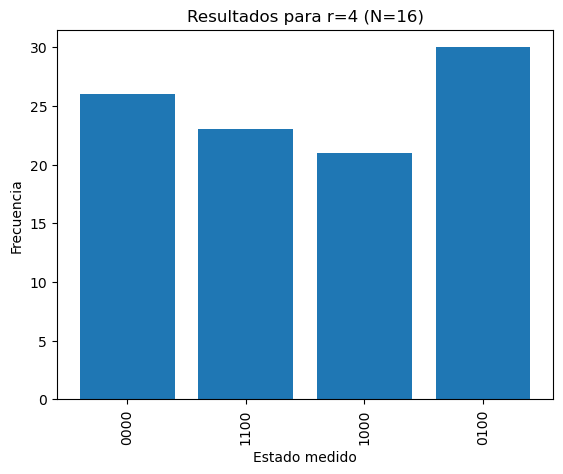

In [45]:
# ==============================================
# 8. Ejecución del circuito
# ==============================================
simulator = AerSimulator()
compiled_circuit = qc.decompose()  # Descomponer en puertas básicas
result = simulator.run(compiled_circuit, shots=100).result()
counts = result.get_counts()

# Visualizar resultados
print("\nResultados de las mediciones:")
plt.bar(counts.keys(), counts.values())
plt.title(f"Resultados para r={r} (N={N})")
plt.xlabel("Estado medido")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)
plt.show()

In [46]:
# ==============================================
# 9. Post-procesamiento con fracciones continuas (Paso 7)
# ==============================================
def find_period_from_measurements(counts, N, r):
    """Encuentra el período usando fracciones continuas"""
    candidates = []
    
    for measurement in counts:
        y = int(measurement, 2)  # Convertir binario a entero
        
        # Ignorar medición 0
        if y == 0:
            continue
            
        # Calcular fracción continua
        fraction = Fraction(y, N).limit_denominator(r*2)
        candidate = fraction.denominator
        
        # Verificar si es divisor válido
        if r % candidate == 0:
            candidates.append(candidate)
    
    # Seleccionar el candidato más común
    if candidates:
        return max(set(candidates), key=candidates.count)
    return None

# Encontrar período
found_period = find_period_from_measurements(counts, N, r)
print(f"\nPeríodo encontrado: {found_period} (esperado: {r})")


Período encontrado: 4 (esperado: 4)


- Fracciones continuas: Método eficiente para aproximar y/N

- limit_denominator(r*2): Limita la búsqueda a denominadores relevantes

- Verificación: Confirma que el candidato es divisor de r

- Selección por frecuencia: Usa el candidato más común de las mediciones

In [48]:
# ==============================================
# 10. Validación del resultado
# ==============================================
if found_period == r:
    print("✅ ¡Éxito! Período correcto encontrado")
    print("El algoritmo funciona como se esperaba")
else:
    print("❌ Error: El período encontrado no coincide")
    print("Posibles causas: muy pocos shots, ruido, o implementación del oráculo")

✅ ¡Éxito! Período correcto encontrado
El algoritmo funciona como se esperaba


## Bibliografía

- Quantum Computation and Quantum Information Nielsen & Chuang